<a href="https://colab.research.google.com/github/ahmadkaleem2/kaggle_digit_Recognition/blob/main/kaggle_digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries and import dataset and describing it

In [42]:
import tensorflow as tf
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [43]:
dataset1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/train.csv')
dataset = dataset1

In [44]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [46]:
dataset.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


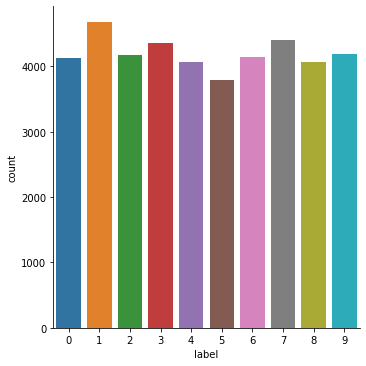

In [47]:
sns.catplot('label',data=dataset,kind='count')

**Extracting data and labels from dataset**

In [48]:
labels = dataset['label']
data = dataset.drop('label',axis=1)

In [49]:
data.shape

(42000, 784)

Reshaping data from 784 to 28 x 28 image

In [50]:
data = np.array(data.values).reshape((-1,28,28))

# Visualizing an image and its label

Text(0.5, 1.0, '3')

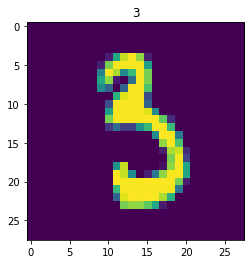

In [51]:
plot_image = np.random.randint(dataset.shape[0])

plt.imshow(data[plot_image])
plt.title(labels.iloc[plot_image])


**Pixel Values of an image**

In [52]:
data[plot_image]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 152, 233,
        254, 213,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 203, 253, 252,
        253, 252, 142,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

**Converting pixel values to  [0,1]**

In [53]:

data = data/255.
labels = labels.to_numpy()

In [54]:
data = data.reshape((-1,28,28,1))
labels = labels.reshape((-1,1))

In [55]:
dataset.shape,labels.shape

((42000, 785), (42000, 1))

**Converting into training and test sets**

In [56]:
X_train, X_test, y_train,y_test = train_test_split(data,labels,test_size=0.3,random_state=42)

**To Make confusion Matrix**

In [60]:
import itertools 
from sklearn.metrics import confusion_matrix
figsize = (10,10)

# create the confusion matrix
def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):



  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  fig,ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)



  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  ax.set(title="confusion matrix",xlabel='predicted label',ylabel='True label',xticks = np.arange(n_classes),yticks=np.arange(n_classes),xticklabels=labels,yticklabels=labels)
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(20)

  threshold = (cm.max()+cm.min())/2.

  #plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:0.1f}%)",
            horizontalalignment='center',
            color="white" if cm[i,j]>threshold else "black",
            size=15)

# Kaggle Score for the model below

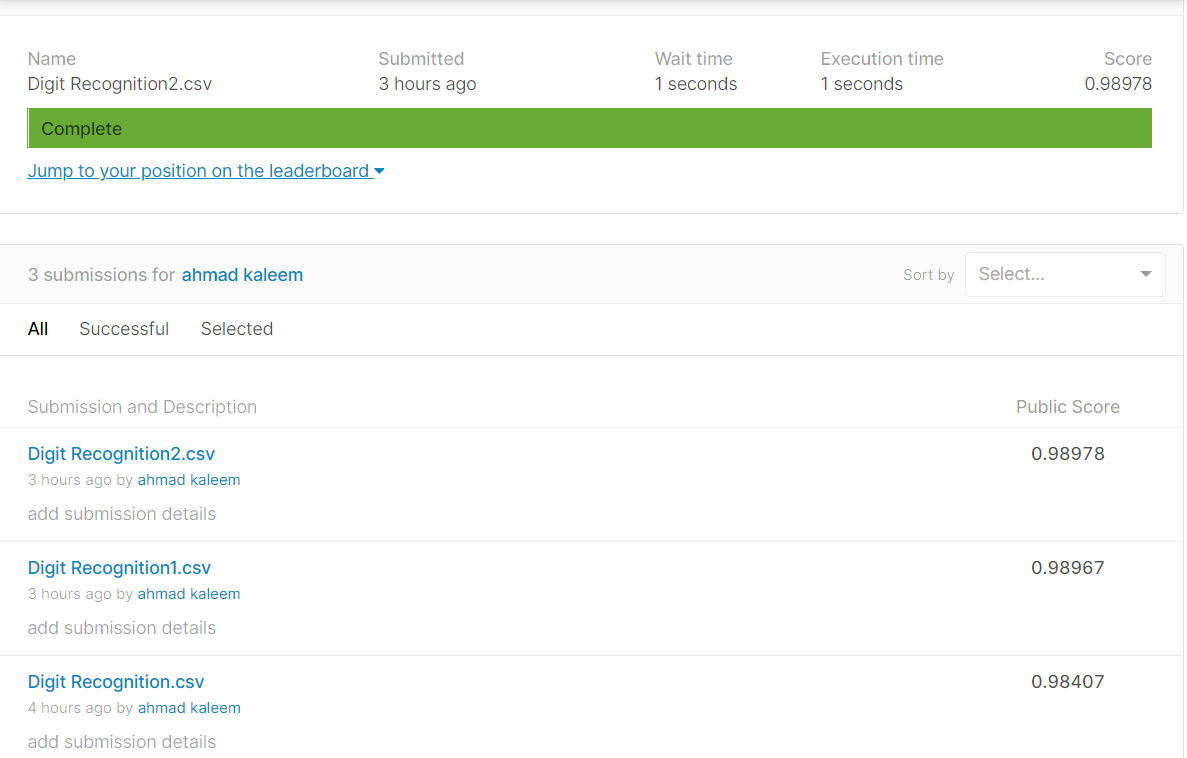

# This is the best performing model out of 12


In [75]:
# setting seed for reproducabiliity
tf.random.set_seed(42)
#creating a callback to cancel training when accuracy reaches 99.15%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    
    if(logs.get('val_accuracy')>0.9915):
      print("\nReached 99.15% accuracy so cancelling training!")
      self.model.stop_training = True
#Creating a learning rate scheduler which reduces learning after some epochs to prevent gradient explosion but is susceptible to gradient vanishing
def lr_sched(epoch,lr):
  if epoch>10 and epoch<15:
    return lr*0.9
  elif epoch>20 and epoch<25:
    return lr*0.8
  return lr


# creating a model using sequential api 
model_12 = tf.keras.Sequential([
                               

                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               
                               tf.keras.layers.Dense(128,'relu'),
                               
                               tf.keras.layers.Dropout(0.5),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dense(64,'relu'),
                               tf.keras.layers.Dropout(0.25),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dense(32,'relu'),
                               tf.keras.layers.Dropout(0.125),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dense(10,'softmax')
])
stop_training=myCallback()
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_sched)
model_12.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_12.fit(X_train,y_train,epochs=30,callbacks=[lr_scheduler,stop_training],validation_data=(X_test,y_test))

Epoch 1/30
919/919 [==============================] - 25s 26ms/step - loss: 0.7755 - accuracy: 0.7622 - val_loss: 0.1288 - val_accuracy: 0.9621
Epoch 2/30
919/919 [==============================] - 23s 26ms/step - loss: 0.2717 - accuracy: 0.9240 - val_loss: 0.0810 - val_accuracy: 0.9764
Epoch 3/30
919/919 [==============================] - 24s 26ms/step - loss: 0.2013 - accuracy: 0.9426 - val_loss: 0.0628 - val_accuracy: 0.9808
Epoch 4/30
919/919 [==============================] - 24s 26ms/step - loss: 0.1632 - accuracy: 0.9556 - val_loss: 0.0574 - val_accuracy: 0.9830
Epoch 5/30
919/919 [==============================] - 24s 26ms/step - loss: 0.1464 - accuracy: 0.9607 - val_loss: 0.0503 - val_accuracy: 0.9842
Epoch 6/30
919/919 [==============================] - 24s 26ms/step - loss: 0.1305 - accuracy: 0.9643 - val_loss: 0.0445 - val_accuracy: 0.9868
Epoch 7/30
919/919 [==============================] - 25s 27ms/step - loss: 0.1203 - accuracy: 0.9668 - val_loss: 0.0501 - val_accuracy:

# Confusion matrix for the above model

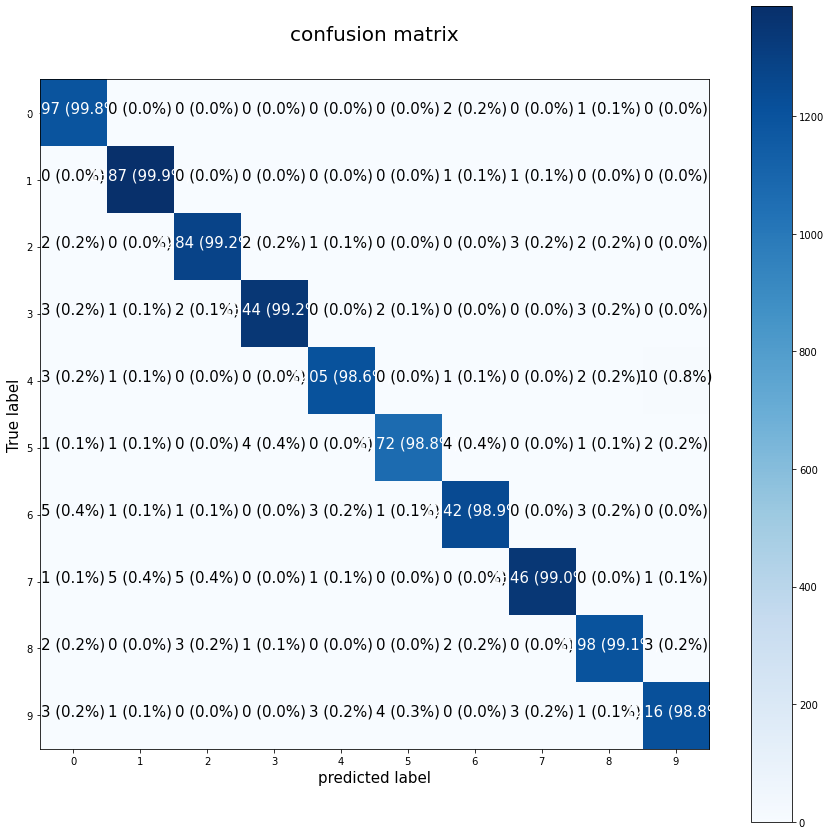

In [76]:
make_confusion_matrix(y_test,tf.argmax(tf.round(model_12.predict(X_test)),axis=-1), classes = ['0','1','2','3','4','5','6','7','8','9'],figsize=(15,15))

# Prediction for kaggle's test set

In [82]:
test1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/test.csv')
test1.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001357,0.012500,0.016786,0.031714,0.056000,0.100464,0.166929,...,3.272536,2.371464,1.454357,0.846286,0.509750,0.254750,0.062107,0.015250,0.000786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005429,0.024179,0.036250,0.083143,0.134107,0.201071,0.325000,0.366714,0.468143,0.589429,0.656964,0.569714,0.464214,0.323679,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227093,1.566275,1.513515,2.674449,3.216234,4.549478,5.470524,...,25.211706,21.240003,16.643468,12.637953,9.963879,7.031504,3.040514,1.265562,0.131475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640468,2.234963,2.493982,3.777711,4.946940,6.262819,7.714814,8.243535,8.974038,10.488695,11.209508,10.204173,9.402197,7.878854,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [83]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [84]:
test1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
pred_on = test1.to_numpy()
pred_on = pred_on/255.
pred_on = pred_on.reshape((-1,28,28,1))
predictions = model_12.predict(pred_on)
preds = tf.argmax(predictions,axis=1)
pred = {'Imageid': np.arange(1,28001),'Label': tf.argmax(predictions,axis=1)}
pred = pd.DataFrame(pred)
pred
#pred.to_csv('Digit Recognition.csv',index=False,header=1)

,Imageid,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


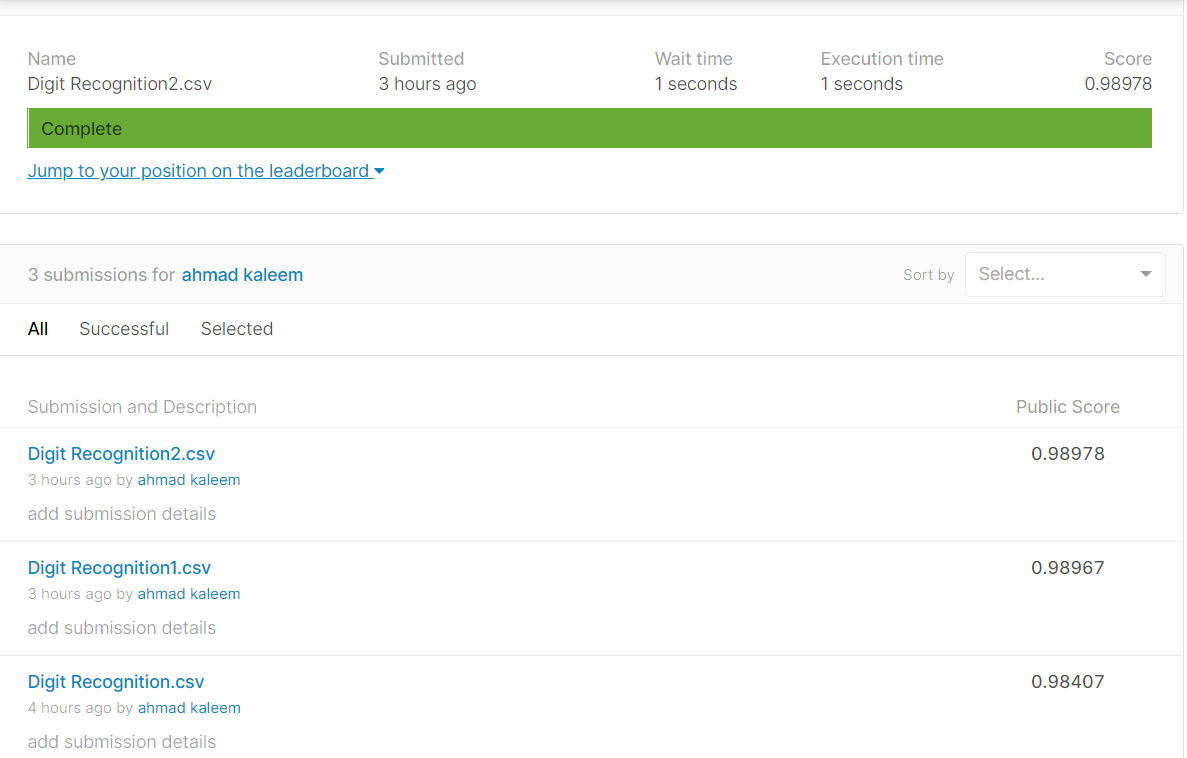

# Other Model before reaching best accuracy

In [86]:
tf.random.set_seed(42)

def lr_sched(epoch,lr):
  if epoch>5:
    return lr*0.75
  return lr


model_2 = tf.keras.Sequential([
                               

                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                             #  tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                              # tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100,'relu'),
                               tf.keras.layers.Dense(25,'relu'),
                               tf.keras.layers.Dense(10,'softmax')
])

callback = tf.keras.callbacks.LearningRateScheduler(lr_sched)
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_2.fit(X_train,y_train,epochs=10,callbacks=[callback],validation_data=(X_test,y_test))

Epoch 1/10
919/919 [==============================] - 21s 22ms/step - loss: 0.2124 - accuracy: 0.9351 - val_loss: 0.0962 - val_accuracy: 0.9704
Epoch 2/10
919/919 [==============================] - 20s 22ms/step - loss: 0.0686 - accuracy: 0.9790 - val_loss: 0.0843 - val_accuracy: 0.9760
Epoch 3/10
919/919 [==============================] - 20s 22ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 0.0777 - val_accuracy: 0.9779
Epoch 4/10
919/919 [==============================] - 20s 22ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0961 - val_accuracy: 0.9764
Epoch 5/10
919/919 [==============================] - 20s 22ms/step - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.0985 - val_accuracy: 0.9781
Epoch 6/10
919/919 [==============================] - 20s 22ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.1085 - val_accuracy: 0.9791
Epoch 7/10
919/919 [==============================] - 20s 22ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0827 - val_accuracy:

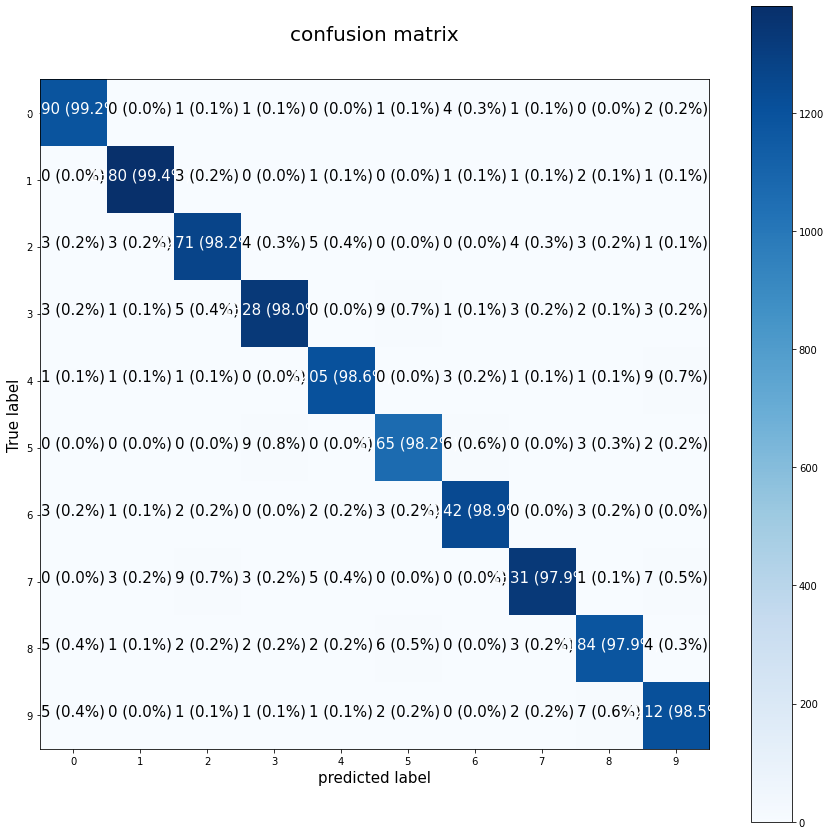

In [87]:
make_confusion_matrix(y_test,tf.argmax(tf.round(model_2.predict(X_test)),axis=-1), classes = ['0','1','2','3','4','5','6','7','8','9'],figsize=(15,15))

In [88]:
tf.random.set_seed(42)

def lr_sched(epoch,lr):
  if epoch>5:
    return lr*0.75
  return lr


model_3 = tf.keras.Sequential([
                               

                               tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                             #  tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                              # tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100,'relu'),
                               tf.keras.layers.Dense(25,'relu'),
                               tf.keras.layers.Dense(10,'softmax')
])

callback = tf.keras.callbacks.LearningRateScheduler(lr_sched)
model_3.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_3.fit(X_train,y_train,epochs=10,callbacks=[callback],validation_data=(X_test,y_test))

Epoch 1/10
919/919 [==============================] - 15s 16ms/step - loss: 0.2949 - accuracy: 0.9110 - val_loss: 0.1387 - val_accuracy: 0.9582
Epoch 2/10
919/919 [==============================] - 14s 16ms/step - loss: 0.0926 - accuracy: 0.9718 - val_loss: 0.0804 - val_accuracy: 0.9756
Epoch 3/10
919/919 [==============================] - 15s 16ms/step - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.0760 - val_accuracy: 0.9774
Epoch 4/10
919/919 [==============================] - 14s 16ms/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0737 - val_accuracy: 0.9774
Epoch 5/10
919/919 [==============================] - 14s 16ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0684 - val_accuracy: 0.9806
Epoch 6/10
919/919 [==============================] - 14s 16ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.0619 - val_accuracy: 0.9824
Epoch 7/10
919/919 [==============================] - 14s 16ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0600 - val_accuracy:

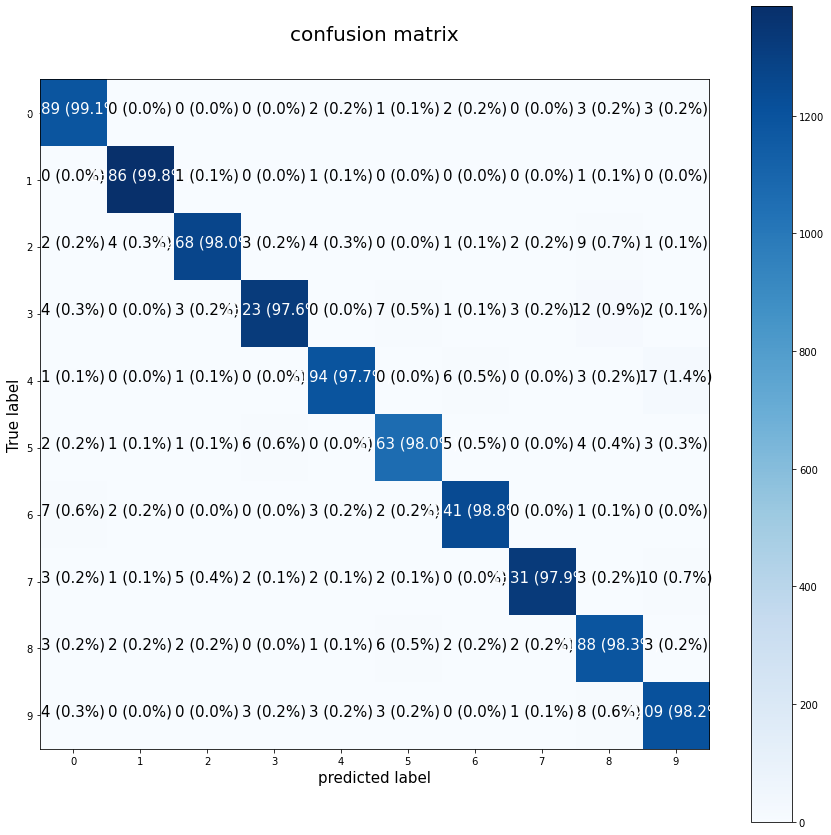

In [89]:
make_confusion_matrix(y_test,tf.argmax(tf.round(model_3.predict(X_test)),axis=-1), classes = ['0','1','2','3','4','5','6','7','8','9'],figsize=(15,15))

In [90]:
tf.random.set_seed(42)

def lr_sched(epoch,lr):
  if epoch>5:
    return lr*0.75
  return lr


model_4 = tf.keras.Sequential([
                               

                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100,'relu'),
                               tf.keras.layers.Dense(25,'relu'),
                               tf.keras.layers.Dense(10,'softmax')
])

callback = tf.keras.callbacks.LearningRateScheduler(lr_sched)
model_4.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_4.fit(X_train,y_train,epochs=10,callbacks=[callback],validation_data=(X_test,y_test))

Epoch 1/10
919/919 [==============================] - 23s 25ms/step - loss: 0.3072 - accuracy: 0.9035 - val_loss: 0.1118 - val_accuracy: 0.9655
Epoch 2/10
919/919 [==============================] - 22s 24ms/step - loss: 0.0891 - accuracy: 0.9718 - val_loss: 0.0762 - val_accuracy: 0.9762
Epoch 3/10
919/919 [==============================] - 22s 24ms/step - loss: 0.0619 - accuracy: 0.9801 - val_loss: 0.0546 - val_accuracy: 0.9821
Epoch 4/10
919/919 [==============================] - 22s 24ms/step - loss: 0.0474 - accuracy: 0.9848 - val_loss: 0.0566 - val_accuracy: 0.9829
Epoch 5/10
919/919 [==============================] - 22s 24ms/step - loss: 0.0368 - accuracy: 0.9875 - val_loss: 0.0481 - val_accuracy: 0.9850
Epoch 6/10
919/919 [==============================] - 22s 24ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.0505 - val_accuracy: 0.9840
Epoch 7/10
919/919 [==============================] - 23s 25ms/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.0532 - val_accuracy:

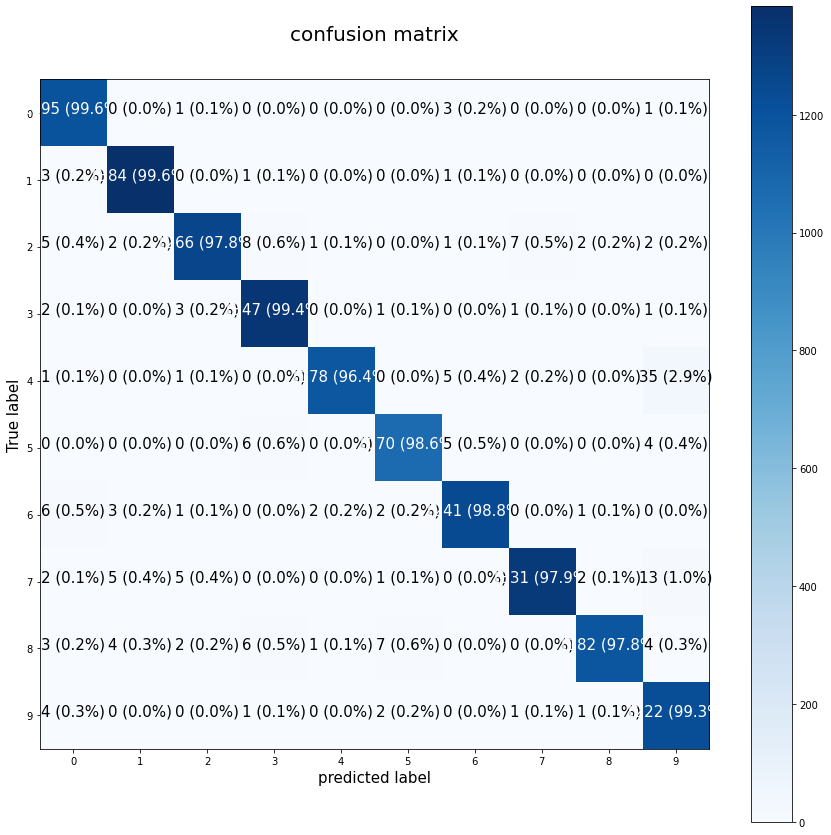

In [91]:
make_confusion_matrix(y_test,tf.argmax(tf.round(model_4.predict(X_test)),axis=-1), classes = ['0','1','2','3','4','5','6','7','8','9'],figsize=(15,15))

In [92]:
tf.random.set_seed(42)

def lr_sched(epoch,lr):
  if epoch>5:
    return lr*0.75
  return lr


model_5 = tf.keras.Sequential([
                               

                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100,'relu'),
                               tf.keras.layers.Dense(25,'relu'),
                               tf.keras.layers.Dense(10,'softmax')
])

callback = tf.keras.callbacks.LearningRateScheduler(lr_sched)
model_5.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_5.fit(X_train,y_train,epochs=10,callbacks=[callback],validation_data=(X_test,y_test))

Epoch 1/10
919/919 [==============================] - 26s 28ms/step - loss: 0.2576 - accuracy: 0.9196 - val_loss: 0.0920 - val_accuracy: 0.9717
Epoch 2/10
919/919 [==============================] - 25s 28ms/step - loss: 0.0726 - accuracy: 0.9783 - val_loss: 0.0839 - val_accuracy: 0.9736
Epoch 3/10
919/919 [==============================] - 25s 28ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0630 - val_accuracy: 0.9789
Epoch 4/10
919/919 [==============================] - 25s 27ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0434 - val_accuracy: 0.9862
Epoch 5/10
919/919 [==============================] - 25s 28ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0461 - val_accuracy: 0.9856
Epoch 6/10
919/919 [==============================] - 25s 27ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.0469 - val_accuracy: 0.9867
Epoch 7/10
919/919 [==============================] - 25s 27ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0494 - val_accuracy:

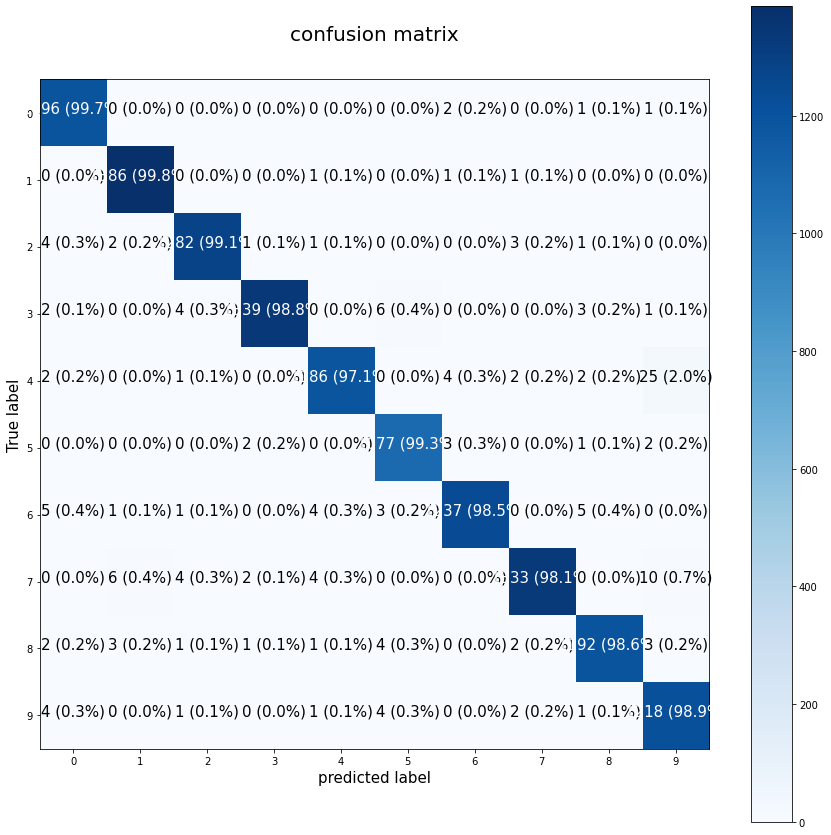

In [93]:
make_confusion_matrix(y_test,tf.argmax(tf.round(model_5.predict(X_test)),axis=-1), classes = ['0','1','2','3','4','5','6','7','8','9'],figsize=(15,15))

In [94]:
tf.random.set_seed(42)

def lr_sched(epoch,lr):
  if epoch>5:
    return lr*0.75
  return lr


model_6 = tf.keras.Sequential([
                               

                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((4,4)),
                               tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100,'relu'),
                               tf.keras.layers.Dense(25,'relu'),
                               tf.keras.layers.Dense(10,'softmax')
])

callback = tf.keras.callbacks.LearningRateScheduler(lr_sched)
model_6.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_6.fit(X_train,y_train,epochs=10,callbacks=[callback],validation_data=(X_test,y_test))

Epoch 1/10
919/919 [==============================] - 16s 17ms/step - loss: 0.4279 - accuracy: 0.8620 - val_loss: 0.1377 - val_accuracy: 0.9564
Epoch 2/10
919/919 [==============================] - 16s 17ms/step - loss: 0.1103 - accuracy: 0.9647 - val_loss: 0.1066 - val_accuracy: 0.9663
Epoch 3/10
919/919 [==============================] - 16s 17ms/step - loss: 0.0824 - accuracy: 0.9737 - val_loss: 0.0834 - val_accuracy: 0.9748
Epoch 4/10
919/919 [==============================] - 16s 17ms/step - loss: 0.0629 - accuracy: 0.9795 - val_loss: 0.0648 - val_accuracy: 0.9790
Epoch 5/10
919/919 [==============================] - 16s 17ms/step - loss: 0.0529 - accuracy: 0.9831 - val_loss: 0.0582 - val_accuracy: 0.9813
Epoch 6/10
919/919 [==============================] - 16s 17ms/step - loss: 0.0451 - accuracy: 0.9852 - val_loss: 0.0650 - val_accuracy: 0.9794
Epoch 7/10
919/919 [==============================] - 16s 17ms/step - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.0569 - val_accuracy:

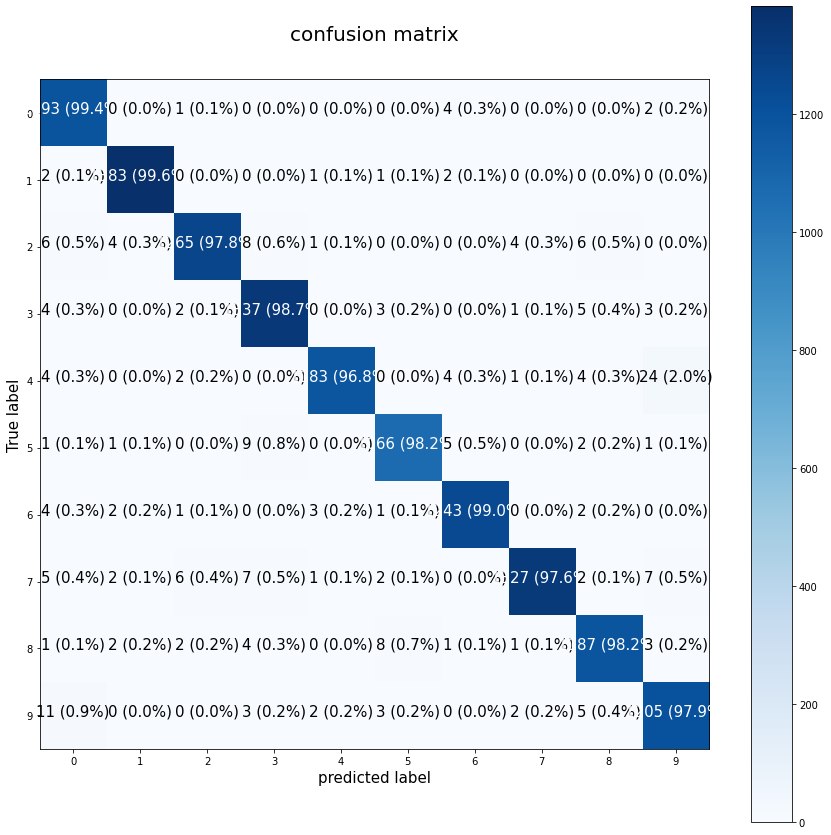

In [95]:
make_confusion_matrix(y_test,tf.argmax(tf.round(model_6.predict(X_test)),axis=-1), classes = ['0','1','2','3','4','5','6','7','8','9'],figsize=(15,15))

In [96]:
tf.random.set_seed(42)

def lr_sched(epoch,lr):
  if epoch>5:
    return lr*0.75
  return lr


model_7 = tf.keras.Sequential([
                               

                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((4,4)),
                              # tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                              # tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100,'relu'),
                               tf.keras.layers.Dense(25,'relu'),
                               tf.keras.layers.Dense(10,'softmax')
])

callback = tf.keras.callbacks.LearningRateScheduler(lr_sched)
model_7.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_7.fit(X_train,y_train,epochs=10,callbacks=[callback],validation_data=(X_test,y_test))

Epoch 1/10
919/919 [==============================] - 16s 17ms/step - loss: 0.3487 - accuracy: 0.8940 - val_loss: 0.1354 - val_accuracy: 0.9589
Epoch 2/10
919/919 [==============================] - 15s 16ms/step - loss: 0.1070 - accuracy: 0.9672 - val_loss: 0.0996 - val_accuracy: 0.9692
Epoch 3/10
919/919 [==============================] - 15s 16ms/step - loss: 0.0748 - accuracy: 0.9767 - val_loss: 0.0774 - val_accuracy: 0.9759
Epoch 4/10
919/919 [==============================] - 15s 16ms/step - loss: 0.0568 - accuracy: 0.9823 - val_loss: 0.0641 - val_accuracy: 0.9787
Epoch 5/10
919/919 [==============================] - 15s 16ms/step - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.0611 - val_accuracy: 0.9799
Epoch 6/10
919/919 [==============================] - 15s 16ms/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0566 - val_accuracy: 0.9815
Epoch 7/10
919/919 [==============================] - 15s 16ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0602 - val_accuracy:

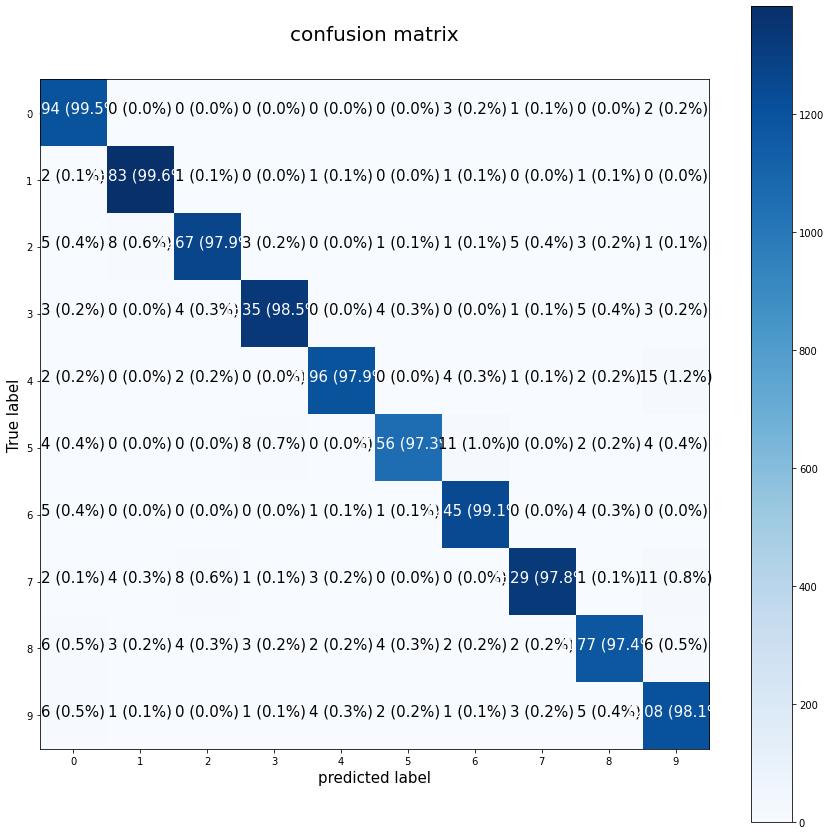

In [97]:
make_confusion_matrix(y_test,tf.argmax(tf.round(model_7.predict(X_test)),axis=-1), classes = ['0','1','2','3','4','5','6','7','8','9'],figsize=(15,15))

In [98]:
tf.random.set_seed(42)

def lr_sched(epoch,lr):
  if epoch>5:
    return lr*0.75
  return lr


model_8 = tf.keras.Sequential([
                               

                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100,'relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(25,'relu'),
                               tf.keras.layers.Dense(10,'softmax')
])

callback = tf.keras.callbacks.LearningRateScheduler(lr_sched)
model_8.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_8.fit(X_train,y_train,epochs=10,callbacks=[callback],validation_data=(X_test,y_test))

Epoch 1/10
919/919 [==============================] - 24s 25ms/step - loss: 0.3507 - accuracy: 0.8894 - val_loss: 0.1106 - val_accuracy: 0.9640
Epoch 2/10
919/919 [==============================] - 23s 25ms/step - loss: 0.1042 - accuracy: 0.9680 - val_loss: 0.0705 - val_accuracy: 0.9771
Epoch 3/10
919/919 [==============================] - 23s 25ms/step - loss: 0.0775 - accuracy: 0.9759 - val_loss: 0.0568 - val_accuracy: 0.9821
Epoch 4/10
919/919 [==============================] - 23s 25ms/step - loss: 0.0586 - accuracy: 0.9818 - val_loss: 0.0563 - val_accuracy: 0.9822
Epoch 5/10
919/919 [==============================] - 23s 25ms/step - loss: 0.0476 - accuracy: 0.9849 - val_loss: 0.0538 - val_accuracy: 0.9837
Epoch 6/10
919/919 [==============================] - 23s 25ms/step - loss: 0.0427 - accuracy: 0.9867 - val_loss: 0.0475 - val_accuracy: 0.9864
Epoch 7/10
919/919 [==============================] - 23s 25ms/step - loss: 0.0307 - accuracy: 0.9899 - val_loss: 0.0444 - val_accuracy:

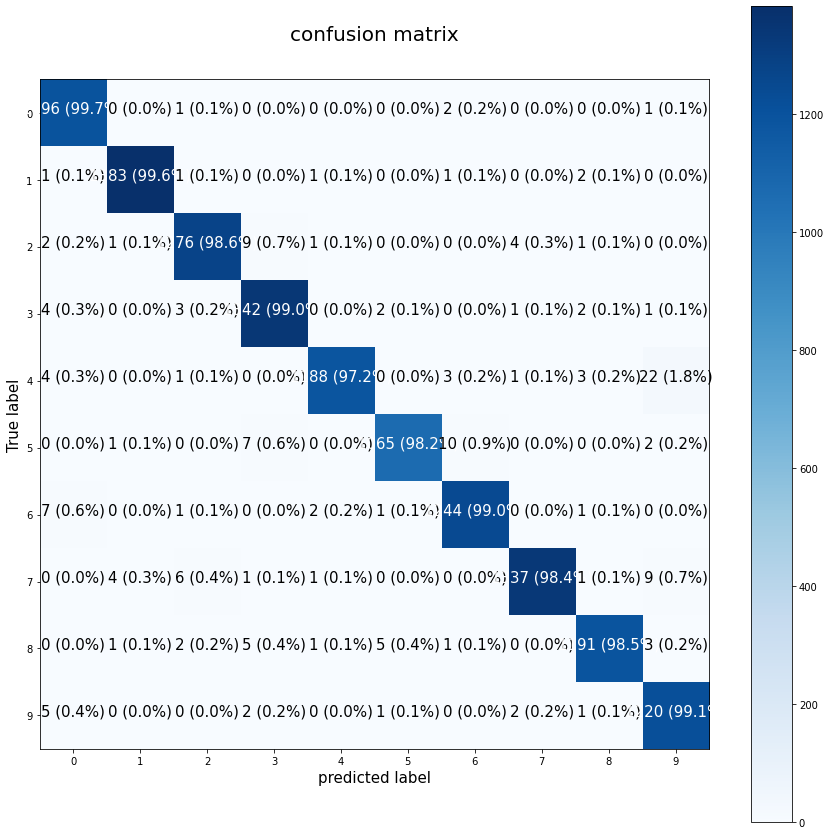

In [99]:
make_confusion_matrix(y_test,tf.argmax(tf.round(model_8.predict(X_test)),axis=-1), classes = ['0','1','2','3','4','5','6','7','8','9'],figsize=(15,15))

In [100]:
tf.random.set_seed(42)

def lr_sched(epoch,lr):
  if epoch>5:
    return lr*0.75
  return lr


model_9 = tf.keras.Sequential([
                               

                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(100,'relu'),
                               tf.keras.layers.Dropout(0.5),
                               tf.keras.layers.Dense(25,'relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(10,'softmax')
])

callback = tf.keras.callbacks.LearningRateScheduler(lr_sched)
model_9.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_9.fit(X_train,y_train,epochs=10,callbacks=[callback],validation_data=(X_test,y_test))

Epoch 1/10
919/919 [==============================] - 23s 25ms/step - loss: 0.6002 - accuracy: 0.8072 - val_loss: 0.1272 - val_accuracy: 0.9617
Epoch 2/10
919/919 [==============================] - 23s 25ms/step - loss: 0.2213 - accuracy: 0.9372 - val_loss: 0.0902 - val_accuracy: 0.9721
Epoch 3/10
919/919 [==============================] - 23s 25ms/step - loss: 0.1564 - accuracy: 0.9548 - val_loss: 0.0675 - val_accuracy: 0.9802
Epoch 4/10
919/919 [==============================] - 23s 25ms/step - loss: 0.1363 - accuracy: 0.9624 - val_loss: 0.0617 - val_accuracy: 0.9813
Epoch 5/10
919/919 [==============================] - 23s 25ms/step - loss: 0.1138 - accuracy: 0.9686 - val_loss: 0.0562 - val_accuracy: 0.9839
Epoch 6/10
919/919 [==============================] - 23s 25ms/step - loss: 0.1015 - accuracy: 0.9719 - val_loss: 0.0514 - val_accuracy: 0.9855
Epoch 7/10
919/919 [==============================] - 23s 25ms/step - loss: 0.0835 - accuracy: 0.9764 - val_loss: 0.0474 - val_accuracy:

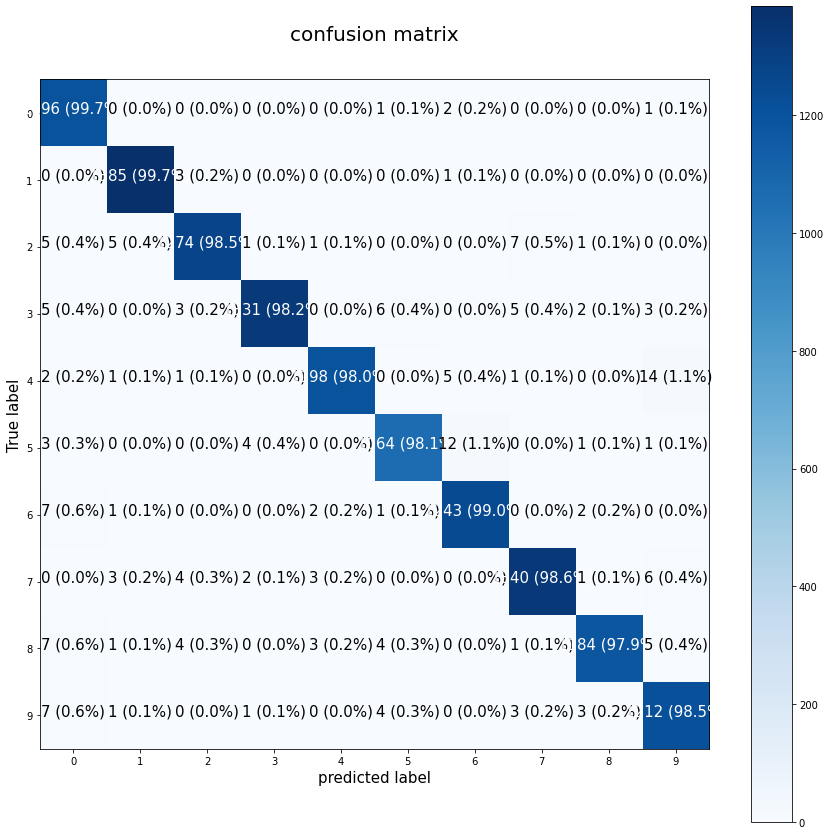

In [101]:
make_confusion_matrix(y_test,tf.argmax(tf.round(model_9.predict(X_test)),axis=-1), classes = ['0','1','2','3','4','5','6','7','8','9'],figsize=(15,15))

In [102]:
tf.random.set_seed(42)

def lr_sched(epoch,lr):
  if epoch>5:
    return lr*0.75
  return lr


model_10 = tf.keras.Sequential([
                               

                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               
                               tf.keras.layers.Dense(128,'relu'),
                               tf.keras.layers.Dropout(0.5),
                               tf.keras.layers.Dense(64,'relu'),
                               tf.keras.layers.Dropout(0.25),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dense(32,'relu'),
                               tf.keras.layers.Dropout(0.125),
                               tf.keras.layers.Dense(10,'softmax')
])

callback = tf.keras.callbacks.LearningRateScheduler(lr_sched)
model_10.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_10.fit(X_train,y_train,epochs=30,callbacks=[callback],validation_data=(X_test,y_test))

Epoch 1/30
919/919 [==============================] - 25s 26ms/step - loss: 0.6280 - accuracy: 0.8097 - val_loss: 0.0999 - val_accuracy: 0.9699
Epoch 2/30
919/919 [==============================] - 23s 25ms/step - loss: 0.1921 - accuracy: 0.9477 - val_loss: 0.0703 - val_accuracy: 0.9799
Epoch 3/30
919/919 [==============================] - 23s 25ms/step - loss: 0.1420 - accuracy: 0.9614 - val_loss: 0.0633 - val_accuracy: 0.9825
Epoch 4/30
919/919 [==============================] - 23s 25ms/step - loss: 0.1123 - accuracy: 0.9682 - val_loss: 0.0672 - val_accuracy: 0.9816
Epoch 5/30
919/919 [==============================] - 23s 25ms/step - loss: 0.1004 - accuracy: 0.9723 - val_loss: 0.0529 - val_accuracy: 0.9840
Epoch 6/30
919/919 [==============================] - 23s 25ms/step - loss: 0.0931 - accuracy: 0.9749 - val_loss: 0.0457 - val_accuracy: 0.9877
Epoch 7/30
919/919 [==============================] - 24s 26ms/step - loss: 0.0690 - accuracy: 0.9815 - val_loss: 0.0494 - val_accuracy:

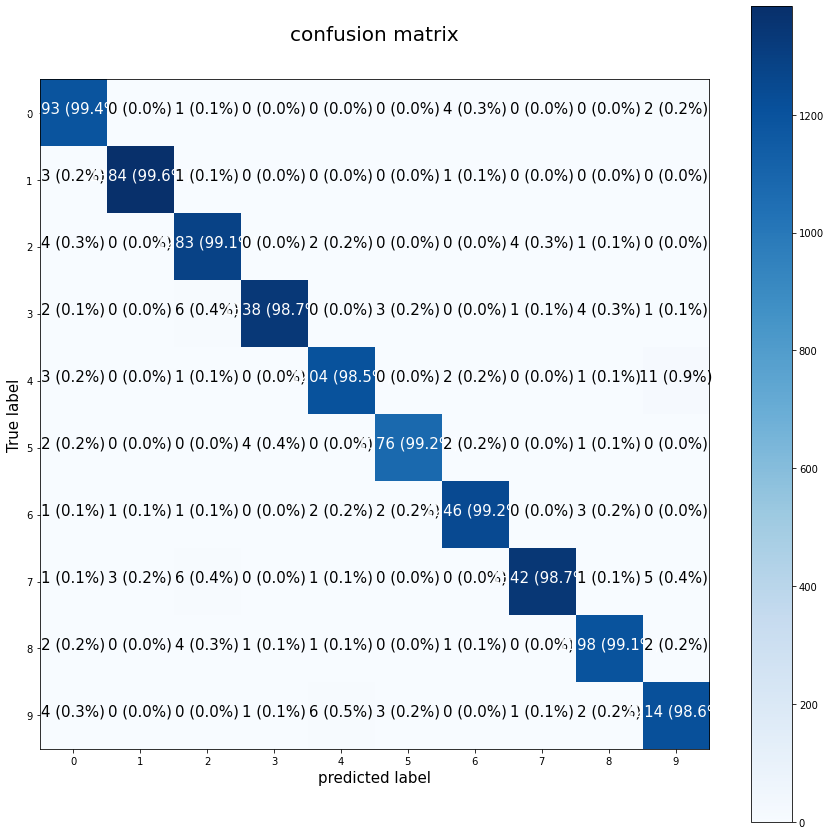

In [103]:
make_confusion_matrix(y_test,tf.argmax(tf.round(model_10.predict(X_test)),axis=-1), classes = ['0','1','2','3','4','5','6','7','8','9'],figsize=(15,15))

In [104]:
tf.random.set_seed(42)

def lr_sched(epoch,lr):
  if epoch>10 and epoch<15:
    return lr*0.9
  elif epoch>20 and epoch<25:
    return lr*0.8
  return lr


model_11 = tf.keras.Sequential([
                               

                               tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                               tf.keras.layers.MaxPool2D((2,2)),
                               tf.keras.layers.Flatten(),
                               
                               tf.keras.layers.Dense(128,'relu'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dropout(0.5),
                               tf.keras.layers.Dense(64,'relu'),
                               tf.keras.layers.Dropout(0.25),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dense(32,'relu'),
                               tf.keras.layers.Dropout(0.125),
                               tf.keras.layers.Dense(10,'softmax')
])

callback = tf.keras.callbacks.LearningRateScheduler(lr_sched)
model_11.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model_11.fit(X_train,y_train,epochs=30,callbacks=[callback],validation_data=(X_test,y_test))

Epoch 1/30
919/919 [==============================] - 24s 25ms/step - loss: 0.5356 - accuracy: 0.8374 - val_loss: 0.0895 - val_accuracy: 0.9721
Epoch 2/30
919/919 [==============================] - 25s 27ms/step - loss: 0.2021 - accuracy: 0.9400 - val_loss: 0.0646 - val_accuracy: 0.9794
Epoch 3/30
919/919 [==============================] - 25s 27ms/step - loss: 0.1437 - accuracy: 0.9591 - val_loss: 0.0851 - val_accuracy: 0.9744
Epoch 4/30
919/919 [==============================] - 25s 27ms/step - loss: 0.1241 - accuracy: 0.9657 - val_loss: 0.0594 - val_accuracy: 0.9822
Epoch 5/30
919/919 [==============================] - 25s 27ms/step - loss: 0.1085 - accuracy: 0.9695 - val_loss: 0.0524 - val_accuracy: 0.9836
Epoch 6/30
919/919 [==============================] - 25s 27ms/step - loss: 0.1019 - accuracy: 0.9723 - val_loss: 0.0505 - val_accuracy: 0.9848
Epoch 7/30
919/919 [==============================] - 25s 27ms/step - loss: 0.0918 - accuracy: 0.9736 - val_loss: 0.0440 - val_accuracy:

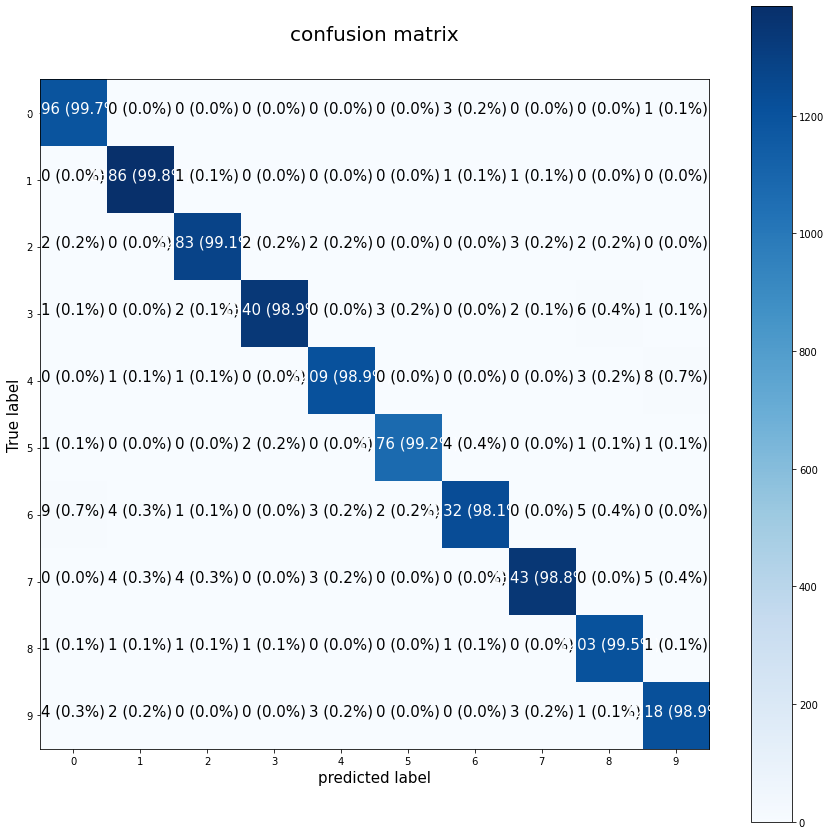

In [105]:
make_confusion_matrix(y_test,tf.argmax(tf.round(model_11.predict(X_test)),axis=-1), classes = ['0','1','2','3','4','5','6','7','8','9'],figsize=(15,15))